In [22]:
import pandas as pd
import numpy as np

import pylab
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.datasets import load_digits

In [23]:
digits = load_digits()

In [24]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

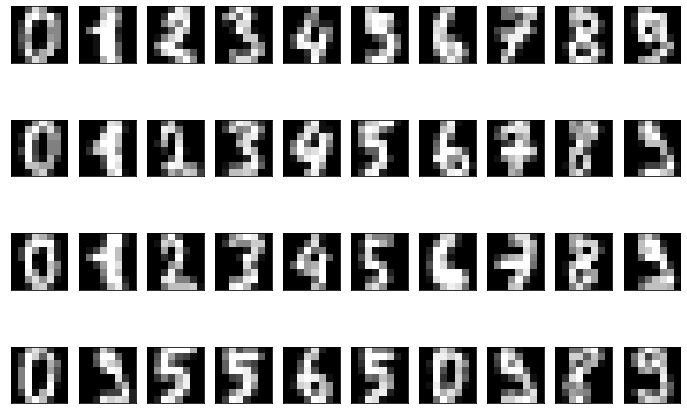

In [25]:
fig, ax = plt.subplots(4, 10, figsize = (12,8), subplot_kw = dict(xticks =[], yticks = []))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap = 'gray')

In [38]:
x = digits.data

y = digits.target

In [39]:
x.shape, y.shape

((1797, 64), (1797,))

In [40]:
from sklearn.decomposition import PCA
model = PCA(50).fit(x)

Text(0, 0.5, 'cummulative variance')

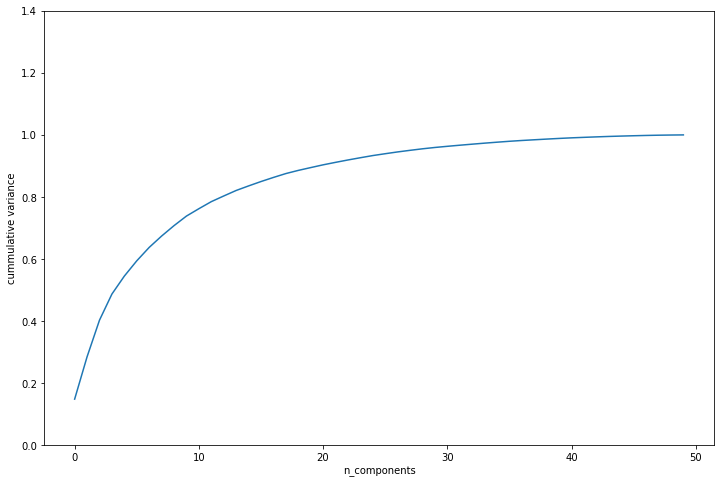

In [41]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(model.explained_variance_ratio_))

pylab.ylim([0, 1.4])

plt.xlabel('n_components')
plt.ylabel('cummulative variance')

In [42]:
classes = list(range(10))
target_names = digits.target_names

def apply_manifold_learning(x, y,method):
    
    x = method.fit_transform(x)
    
    print('new shape of x: ', x.shape)
    print()
    print('sample x \n')
    print(pd.DataFrame(x).sample(10))
    
    fig, ax = plt.subplots(figsize = (12, 8))
    for i, target_name in zip(classes, target_names):
        plt.scatter(x[y == i, 0], x[y == i, 0], label = target_names, cmap = plt.cm.Spectral, s = 100, )
        
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
    plt.legend()
    plt.show()
    
    return method

new shape of x:  (1797, 2)

sample x 

             0         1
137  -0.203385  0.187606
532   0.428303  0.141057
431   0.168351  0.285519
1377 -0.098438 -0.624032
12    0.372460  0.213866
343  -0.026819 -0.063572
1276 -0.455723 -0.539185
816  -0.005646  0.164414
1035 -0.045968  0.014681
1573  0.421039 -0.326771


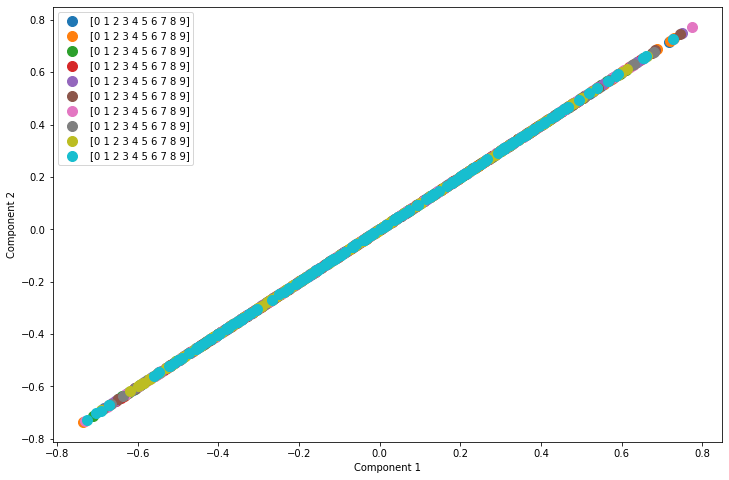

In [43]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(x, y, MDS(n_components = 2,
                                        metric = False,
                                        n_init =  1, max_iter = 100
                                       )
                             )

new shape of x:  (1797, 2)

sample x 

              0          1
915  -16.982932 -30.144272
1378 -32.861352  15.940923
1397  22.129159 -39.252687
1673  24.768504 -26.026598
1054 -20.894124 -17.762098
1360 -28.638252  -5.829523
1617  15.222077  -2.142510
1625 -12.742382  38.405037
42    27.799510   2.181278
1090 -35.808532  13.808839


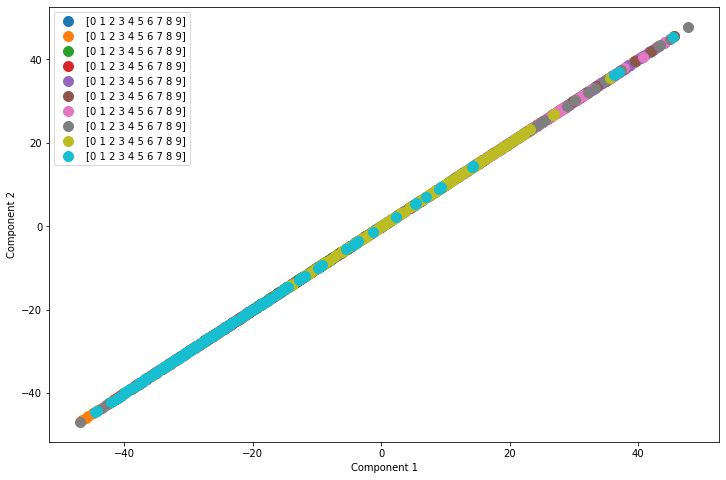

In [44]:
mds = apply_manifold_learning(x, y, MDS(n_components = 2,
                                        metric = True,
                                        n_init =  1, max_iter = 100
                                       )
                             )

new shape of x:  (1797, 2)

sample x 

              0          1
1793  62.618691  16.240954
812   63.122622   7.967229
802   37.612943  13.597927
654   -0.812118 -25.276947
1547 -35.995550 -35.683025
789  -10.277961 -39.324166
932  -59.974223   3.373087
350  -77.796192  11.279542
924   29.571632 -57.232276
730  -45.501298 -40.626420


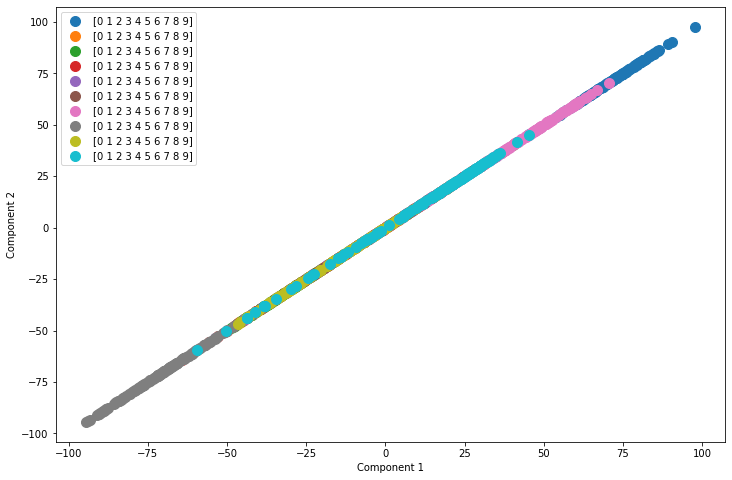

In [45]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(x, y, Isomap(n_neighbors = 30, n_components = 2))

new shape of x:  (1797, 2)

sample x 

             0         1
310   0.011115  0.003691
1543 -0.016663  0.019382
1407  0.004636  0.016239
1326  0.022259 -0.016685
194  -0.004786 -0.001798
151  -0.007327 -0.006501
1625  0.006518  0.010425
1602 -0.067437  0.010284
457  -0.000432  0.032024
1267  0.011273 -0.004378


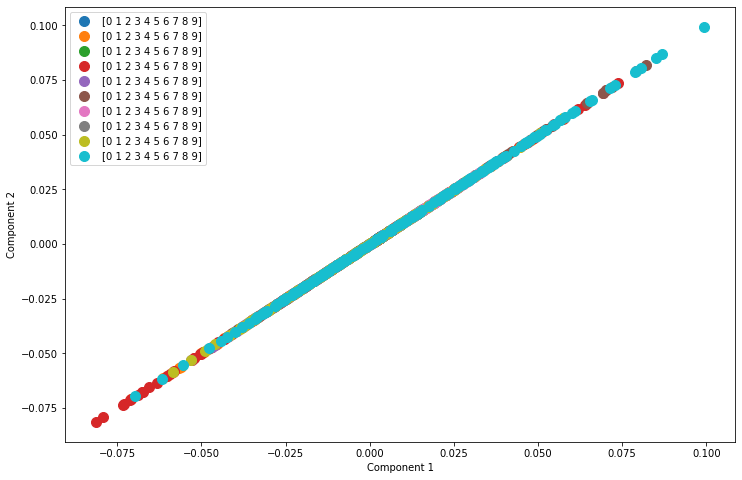

In [46]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(x, y,
                              LocallyLinearEmbedding(n_components = 2, n_neighbors = 30, method = 'standard')
                             )

new shape of x:  (1797, 2)

sample x 

             0         1
1495 -0.006718  0.013264
624  -0.012494  0.019356
592  -0.007492  0.001883
1782 -0.012334  0.006241
1590 -0.011286  0.003243
1689 -0.011610  0.008159
610  -0.012639  0.019413
339  -0.006139  0.009423
876   0.001002 -0.000024
1108 -0.012824  0.019473


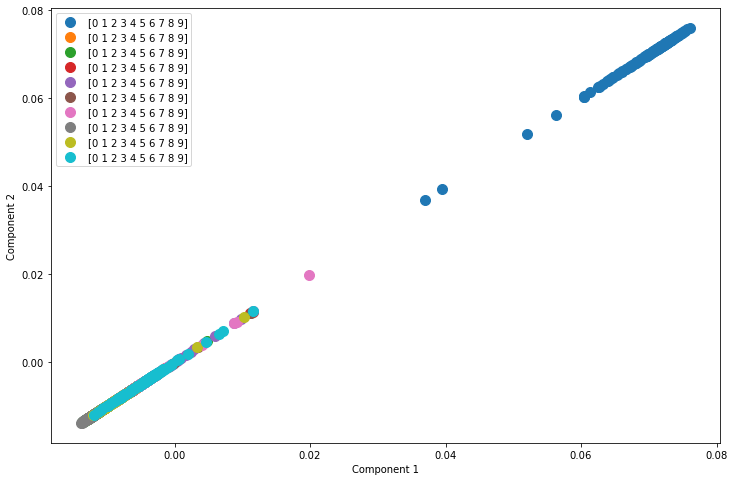

In [47]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(x, y,
                              LocallyLinearEmbedding(n_components = 2, n_neighbors = 30, method = 'modified')
                             )

new shape of x:  (1797, 2)

sample x 

             0         1
1507  0.003092 -0.010843
1111  0.011664 -0.010085
498   0.008677 -0.012121
372   0.011669 -0.008973
395   0.003636 -0.010938
368   0.011487 -0.018830
79   -0.073311 -0.002988
47    0.008579 -0.005603
1306  0.003141 -0.010988
187   0.011545 -0.007894


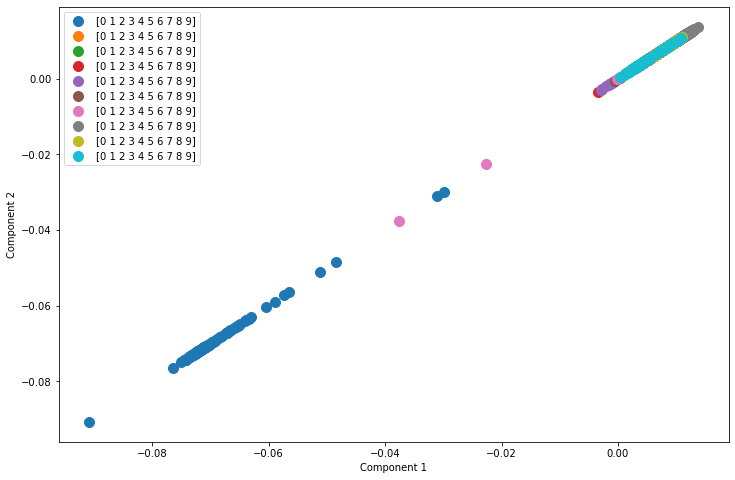

In [48]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(x, y,
                              LocallyLinearEmbedding(n_components = 2, n_neighbors = 30, method = 'hessian')
                             )

new shape of x:  (1797, 2)

sample x 

             0         1
890  -0.000892 -0.000126
602  -0.001730  0.001364
389  -0.000792 -0.002334
953  -0.001669 -0.000765
268  -0.001666 -0.000639
904  -0.000362 -0.002613
1553 -0.000934  0.001176
571   0.003809 -0.001800
1719 -0.001723  0.001551
817   0.000723  0.002642


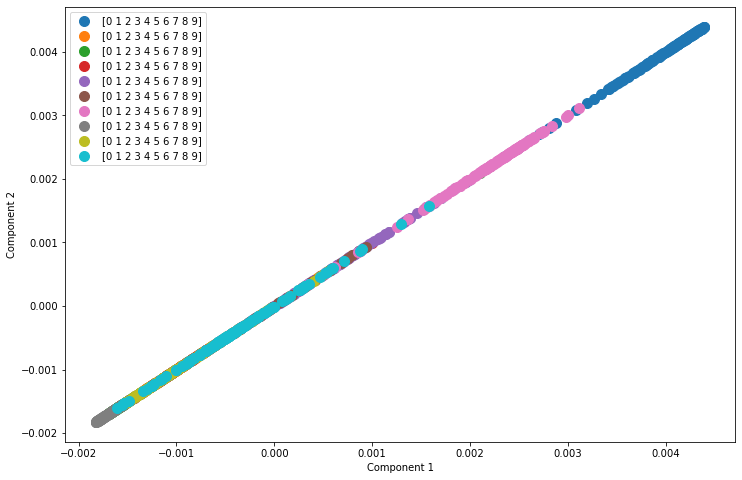

In [49]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(x, y, SpectralEmbedding(n_components = 2, 
                                                          random_state = 0,
                                                          eigen_solver = 'arpack')
                                     )

new shape of x:  (1797, 2)

sample x 

              0          1
1646 -33.069702  27.241669
1468   5.854025   5.135173
580   66.448479  -3.534286
307  -37.276104 -35.777424
316  -50.082027   8.931052
1142 -46.286446 -29.761086
492   20.625053  15.066313
1697  -2.661697  58.007465
1120  22.204458 -19.571796
1090 -50.949406  14.352924


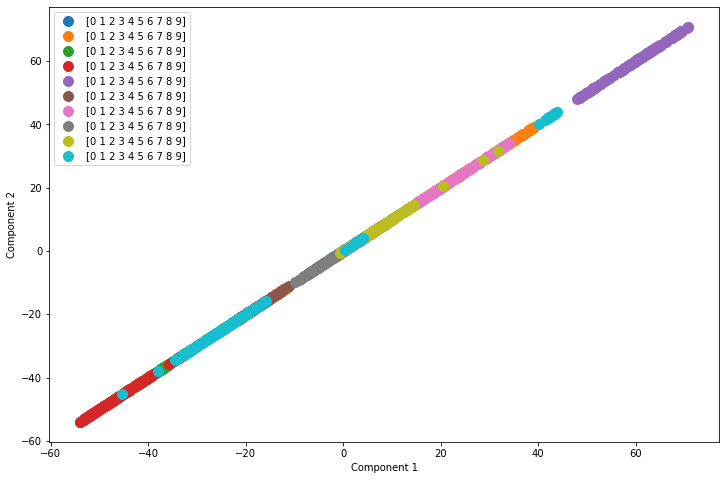

In [50]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(x, y, TSNE(n_components = 2, init = 'pca', random_state = 0 ))